<a href="https://colab.research.google.com/github/henriqueserafin/IA-Senai/blob/main/trabalho_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Os arquivos utilizados estão disponíveis nos links:
1. [Repositório de Dados Eleitorais](https://dadosabertos.tse.jus.br/dataset/?tags=Ano+2024)
2. [Partidos 2024](https://github.com/programacaodinamica/analise-dados/blob/master/dados/partidos2024.csv)
3. [Brasil ShapeFile](https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2022/Brasil/BR/BR_Municipios_2022.zip)

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
!pip install plotly

In [50]:
!pip install geopandas

In [51]:
#Importando pacotes necessários
from zipfile import ZipFile
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [52]:
#Caminho para os arquivos utilizados
arquivo_resultado_2024 = '/content/drive/MyDrive/Datasets/eleicoes/votacao_candidato_munzona_2024.zip'
arquivo_resultado_2020 = '/content/drive/MyDrive/Datasets/eleicoes/votacao_candidato_munzona_2020.zip'
arquivo_resultado_2016 = '/content/drive/MyDrive/Datasets/eleicoes/votacao_candidato_munzona_2016.zip'
arquivo_partidos_2024 = '/content/drive/MyDrive/Datasets/eleicoes/partidos2024.csv'
arquivo_BR_municipios_shapefile = '/content/drive/MyDrive/Datasets/eleicoes/BR_Municipios_2022/BR_Municipios_2022.shp'

In [53]:
#alterando formato de exibição dos gráficos do Pandas
pd.options.plotting.backend = 'plotly'

In [54]:
with ZipFile(arquivo_resultado_2024) as z:
  with z.open(f'votacao_candidato_munzona_2024_BRASIL.csv') as f:
    resultado_2024 = pd.read_csv(f,sep=';',encoding='ISO-8859-1', decimal=',')

In [55]:
with ZipFile(arquivo_resultado_2020) as z:
  with z.open(f'votacao_candidato_munzona_2020_BRASIL.csv') as f:
    resultado_2020 = pd.read_csv(f,sep=';',encoding='ISO-8859-1', decimal=',')

In [56]:
with ZipFile(arquivo_resultado_2016) as z:
  with z.open(f'votacao_candidato_munzona_2016_BRASIL.csv') as f:
    resultado_2016 = pd.read_csv(f,sep=';',encoding='ISO-8859-1', decimal=',')

In [57]:
resultado_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714590 entries, 0 to 714589
Data columns (total 50 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   DT_GERACAO                 714590 non-null  object
 1   HH_GERACAO                 714590 non-null  object
 2   ANO_ELEICAO                714590 non-null  int64 
 3   CD_TIPO_ELEICAO            714590 non-null  int64 
 4   NM_TIPO_ELEICAO            714590 non-null  object
 5   NR_TURNO                   714590 non-null  int64 
 6   CD_ELEICAO                 714590 non-null  int64 
 7   DS_ELEICAO                 714590 non-null  object
 8   DT_ELEICAO                 714590 non-null  object
 9   TP_ABRANGENCIA             714590 non-null  object
 10  SG_UF                      714590 non-null  object
 11  SG_UE                      714590 non-null  int64 
 12  NM_UE                      714590 non-null  object
 13  CD_MUNICIPIO               714590 non-null  

In [58]:
partidos = pd.read_csv(arquivo_partidos_2024, sep=';')

In [59]:
partidos

,Espectro,SG_PARTIDO_TR,SG_PARTIDO,NR_PARTIDO
0,centro,AVANTE,AVANTE,70
1,direita,DC,DC,27
2,direita,DEM,DEM,25
3,centro,MDB,MDB,15
4,direita,NOVO,NOVO,30
5,direita,PATRIOTA,PATRIOTA,51
6,esquerda,PCB,PCB,21
7,esquerda,PCDOB,PC do B,65
8,esquerda,PCO,PCO,29
9,esquerda,PDT,PDT,12


In [60]:
espec_type = pd.CategoricalDtype(categories=['direita', 'centro', 'esquerda'], ordered=True)

In [61]:
partidos['Espectro'] = partidos['Espectro'].astype(espec_type)

In [62]:
partidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Espectro       34 non-null     category
 1   SG_PARTIDO_TR  34 non-null     object  
 2   SG_PARTIDO     34 non-null     object  
 3   NR_PARTIDO     34 non-null     int64   
dtypes: category(1), int64(1), object(2)
memory usage: 1.1+ KB


In [63]:
geo_df = gpd.read_file(arquivo_BR_municipios_shapefile)

In [64]:
geo_df['NM_MUN'] = geo_df['NM_MUN'].str.upper()

In [65]:
geo_df

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,1100015,ALTA FLORESTA D'OESTE,RO,7067.127,"POLYGON ((-62.00806 -12.13379, -62.00784 -12.2..."
1,1100023,ARIQUEMES,RO,4426.571,"POLYGON ((-63.17933 -10.13924, -63.17746 -10.1..."
2,1100031,CABIXI,RO,1314.352,"POLYGON ((-60.52408 -13.32137, -60.37162 -13.3..."
3,1100049,CACOAL,RO,3793.000,"POLYGON ((-61.35502 -11.50452, -61.35524 -11.5..."
4,1100056,CEREJEIRAS,RO,2783.300,"POLYGON ((-60.82135 -13.1191, -60.81773 -13.12..."
...,...,...,...,...,...
5567,5222005,VIANÓPOLIS,GO,954.115,"POLYGON ((-48.31126 -16.84221, -48.3117 -16.84..."
5568,5222054,VICENTINÓPOLIS,GO,733.794,"POLYGON ((-49.73613 -17.74427, -49.73624 -17.7..."
5569,5222203,VILA BOA,GO,1052.593,"POLYGON ((-47.0778 -15.06364, -47.07799 -15.06..."
5570,5222302,VILA PROPÍCIO,GO,2181.593,"POLYGON ((-48.58713 -15.31847, -48.58714 -15.3..."


In [66]:
resultado_2024 = resultado_2024.\
merge(partidos[['NR_PARTIDO','Espectro']], left_on='NR_PARTIDO', right_on='NR_PARTIDO')

In [67]:
resultado_2020 = resultado_2020.\
merge(partidos[['NR_PARTIDO','Espectro']], left_on='NR_PARTIDO', right_on='NR_PARTIDO')

In [68]:
resultado_2016 = resultado_2016.\
merge(partidos[['NR_PARTIDO','Espectro']], left_on='NR_PARTIDO', right_on='NR_PARTIDO')

# Espectro mais votado

In [69]:
votos_espectro_2024 = resultado_2024[(resultado_2024['DS_CARGO']== 'Prefeito')&(resultado_2024['NR_TURNO']==1)].groupby(['CD_MUNICIPIO','Espectro']).agg({'NM_MUNICIPIO':'first','SG_UF':'first','QT_VOTOS_NOMINAIS_VALIDOS':'sum'}).reset_index()
espectro_mais_votado_2024 = votos_espectro_2024.loc[votos_espectro_2024.groupby('CD_MUNICIPIO')['QT_VOTOS_NOMINAIS_VALIDOS'].idxmax()].reset_index(drop=True)
espectro_mais_votado_2024

<ipython-input-69-74324008e563>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  votos_espectro_2024 = resultado_2024[(resultado_2024['DS_CARGO']== 'Prefeito')&(resultado_2024['NR_TURNO']==1)].groupby(['CD_MUNICIPIO','Espectro']).agg({'NM_MUNICIPIO':'first','SG_UF':'first','QT_VOTOS_NOMINAIS_VALIDOS':'sum'}).reset_index()


,CD_MUNICIPIO,Espectro,NM_MUNICIPIO,SG_UF,QT_VOTOS_NOMINAIS_VALIDOS
0,19,direita,GUAJARÁ-MIRIM,RO,14609
1,35,direita,PORTO VELHO,RO,179843
2,51,direita,JI-PARANÁ,RO,67486
3,78,direita,ARIQUEMES,RO,47550
4,94,direita,CACOAL,RO,46495
...,...,...,...,...,...
5554,98990,direita,VILA RICA,MT,9758
5555,99015,direita,COMODORO,MT,8647
5556,99031,direita,FIGUEIRÓPOLIS D OESTE,MT,1312
5557,99058,direita,GUARANTÃ DO NORTE,MT,9166


In [70]:
votos_espectro_2020 = resultado_2020[(resultado_2020['DS_CARGO']== 'Prefeito')&(resultado_2020['NR_TURNO']==1)].groupby(['CD_MUNICIPIO','Espectro']).agg({'NM_MUNICIPIO':'first','SG_UF':'first','QT_VOTOS_NOMINAIS_VALIDOS':'sum'}).reset_index()
espectro_mais_votado_2020 = votos_espectro_2020.loc[votos_espectro_2020.groupby('CD_MUNICIPIO')['QT_VOTOS_NOMINAIS_VALIDOS'].idxmax()].reset_index(drop=True)
espectro_mais_votado_2020

<ipython-input-70-91edbe695291>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  votos_espectro_2020 = resultado_2020[(resultado_2020['DS_CARGO']== 'Prefeito')&(resultado_2020['NR_TURNO']==1)].groupby(['CD_MUNICIPIO','Espectro']).agg({'NM_MUNICIPIO':'first','SG_UF':'first','QT_VOTOS_NOMINAIS_VALIDOS':'sum'}).reset_index()


,CD_MUNICIPIO,Espectro,NM_MUNICIPIO,SG_UF,QT_VOTOS_NOMINAIS_VALIDOS
0,19,direita,GUAJARÁ-MIRIM,RO,9187
1,35,centro,PORTO VELHO,RO,124943
2,51,direita,JI-PARANÁ,RO,25004
3,78,direita,ARIQUEMES,RO,25759
4,94,direita,CACOAL,RO,39031
...,...,...,...,...,...
5562,98990,direita,VILA RICA,MT,5552
5563,99015,direita,COMODORO,MT,6843
5564,99031,direita,FIGUEIRÓPOLIS D OESTE,MT,2471
5565,99058,direita,GUARANTÃ DO NORTE,MT,9695


In [71]:
votos_espectro_2016 = resultado_2016[(resultado_2016['DS_CARGO']=='Prefeito')&(resultado_2016['NR_TURNO']== 1)]\
.groupby(['NR_CANDIDATO','NM_UE'])\
.agg({'Espectro' :'first','NM_URNA_CANDIDATO' :'first', 'NM_MUNICIPIO' :'first', 'CD_MUNICIPIO' :'first',
      'DS_SIT_TOT_TURNO' :'first', 'NR_PARTIDO' :'first',
      'SG_PARTIDO' :'first','QT_VOTOS_NOMINAIS' : 'sum' })\
      .sort_values(by='QT_VOTOS_NOMINAIS',ascending=False)\
      .drop_duplicates(subset=['CD_MUNICIPIO'],keep='first').reset_index(drop=True)
espectro_mais_votado_2016 = votos_espectro_2016

In [72]:
espectro_mais_votado_2024_geo_df = geo_df.merge(espectro_mais_votado_2024, left_on='NM_MUN', right_on='NM_MUNICIPIO')
espectro_mais_votado_2020_geo_df = geo_df.merge(espectro_mais_votado_2020, left_on='NM_MUN', right_on='NM_MUNICIPIO')
espectro_mais_votado_2016_geo_df = geo_df.merge(espectro_mais_votado_2016, left_on='NM_MUN', right_on='NM_MUNICIPIO')

<Axes: title={'center': 'Espectro Mais Votado do Brasil 2024 Prefeito'}>

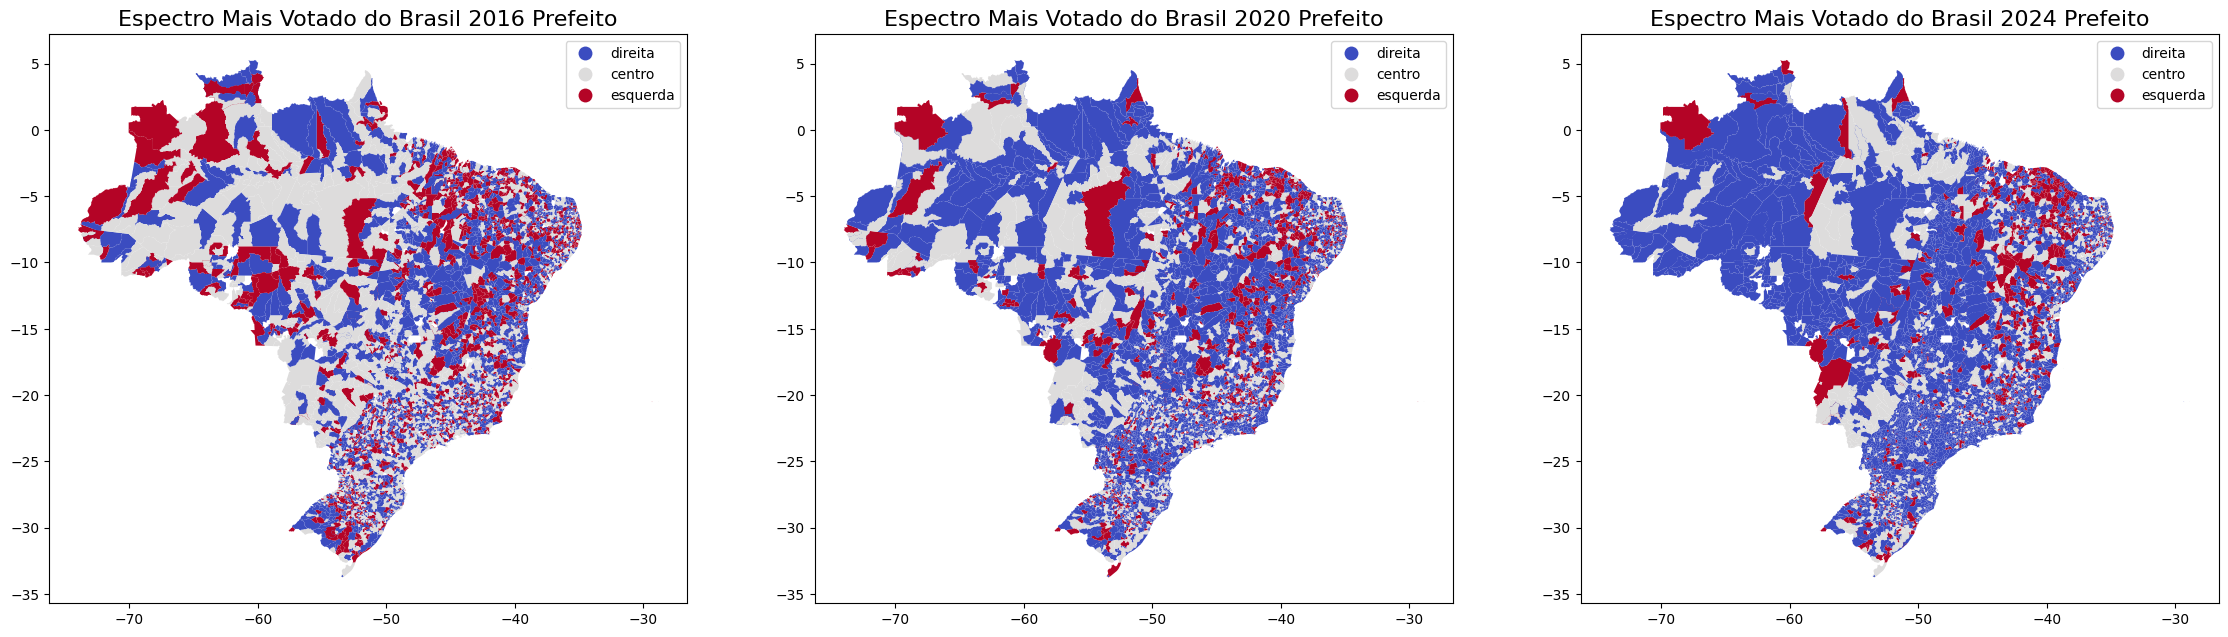

In [73]:
fig, ax = plt.subplots(1,3,figsize=(28,10))
ax[0].set_title(f'Espectro Mais Votado do Brasil 2016 Prefeito', color='black', size=16)
ax[1].set_title(f'Espectro Mais Votado do Brasil 2020 Prefeito', color='black', size=16)
ax[2].set_title(f'Espectro Mais Votado do Brasil 2024 Prefeito', color='black', size=16)

espectro_mais_votado_2016_geo_df.plot(column='Espectro', legend=True, cmap='coolwarm', ax=ax[0])
espectro_mais_votado_2020_geo_df.plot(column='Espectro', legend=True, cmap='coolwarm', ax=ax[1])
espectro_mais_votado_2024_geo_df.plot(column='Espectro', legend=True, cmap='coolwarm', ax=ax[2])

In [74]:
resultado_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897860 entries, 0 to 897859
Data columns (total 39 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   DT_GERACAO                897860 non-null  object  
 1   HH_GERACAO                897860 non-null  object  
 2   ANO_ELEICAO               897860 non-null  int64   
 3   CD_TIPO_ELEICAO           897860 non-null  int64   
 4   NM_TIPO_ELEICAO           897860 non-null  object  
 5   NR_TURNO                  897860 non-null  int64   
 6   CD_ELEICAO                897860 non-null  int64   
 7   DS_ELEICAO                897860 non-null  object  
 8   DT_ELEICAO                897860 non-null  object  
 9   TP_ABRANGENCIA            897860 non-null  object  
 10  SG_UF                     897860 non-null  object  
 11  SG_UE                     897860 non-null  int64   
 12  NM_UE                     897860 non-null  object  
 13  CD_MUNICIPIO              897

Acurácia: 0.5503528830051732


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Relatório de Classificação:
               precision    recall  f1-score   support

      centro       0.00      0.00      0.00     43030
     direita       0.55      1.00      0.71    117983
    esquerda       0.00      0.00      0.00     53364

    accuracy                           0.55    214377
   macro avg       0.18      0.33      0.24    214377
weighted avg       0.30      0.55      0.39    214377

   CD_MUNICIPIO NM_MUNICIPIO SG_UF Espectro_Previsto
0          8087     PERITORÓ    MA           direita
1          8087     PERITORÓ    MA           direita
2          8087     PERITORÓ    MA           direita
3          8087     PERITORÓ    MA           direita
4          8087     PERITORÓ    MA           direita


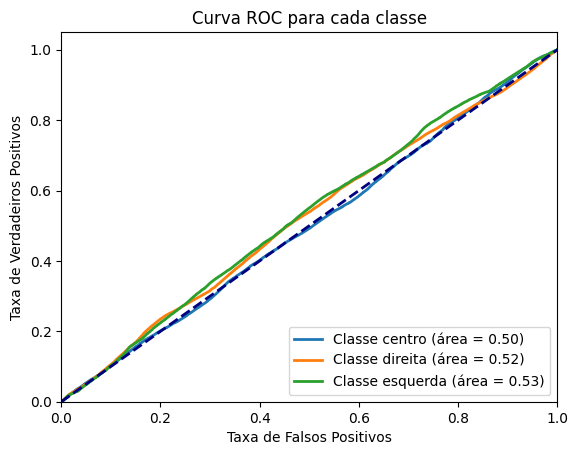

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Importar dados 2024
colunas_importantes = ['CD_MUNICIPIO', 'SG_UF', 'QT_VOTOS_NOMINAIS', 'Espectro', 'NM_MUNICIPIO']
dados_2024 = resultado_2024[colunas_importantes].copy()

# Convertendo texto para número
label_encoder_espectro = LabelEncoder()
dados_2024['Espectro_Cod'] = label_encoder_espectro.fit_transform(dados_2024['Espectro'])
label_encoder_uf = LabelEncoder()
dados_2024['SG_UF_Cod'] = label_encoder_uf.fit_transform(dados_2024['SG_UF'])

# Variáveis independentes (X) e dependente (y)
X = dados_2024[['CD_MUNICIPIO', 'SG_UF_Cod', 'QT_VOTOS_NOMINAIS']]
y = dados_2024['Espectro_Cod']

# Separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando o modelo de Regressão Logística
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

# Fazendo previsões
y_pred = modelo.predict(X_test)

# Avaliando o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, target_names=label_encoder_espectro.classes_))

# Prevendo o resultado para 2028 usando os dados de 2024
dados_2028 = dados_2024.copy()
X_2028 = dados_2028[['CD_MUNICIPIO', 'SG_UF_Cod', 'QT_VOTOS_NOMINAIS']]
dados_2028['Espectro_Previsto_Cod'] = modelo.predict(X_2028)
dados_2028['Espectro_Previsto'] = label_encoder_espectro.inverse_transform(dados_2028['Espectro_Previsto_Cod'])

# Mostrando previsões para 2028
print(dados_2028[['CD_MUNICIPIO', 'NM_MUNICIPIO', 'SG_UF', 'Espectro_Previsto']].head())

# Plotando a curva ROC
fpr = {}
tpr = {}
roc_auc = {}

# Caso multiclasse, utilizar estratégia one-vs-rest
y_score = modelo.decision_function(X_test)

for i in range(len(label_encoder_espectro.classes_)):
    y_test_bin = (y_test == i).astype(int)
    fpr[i], tpr[i], _ = roc_curve(y_test_bin, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Curva ROC
for i in range(len(label_encoder_espectro.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Classe {label_encoder_espectro.classes_[i]} (área = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para cada classe')
plt.legend(loc='lower right')
plt.show()




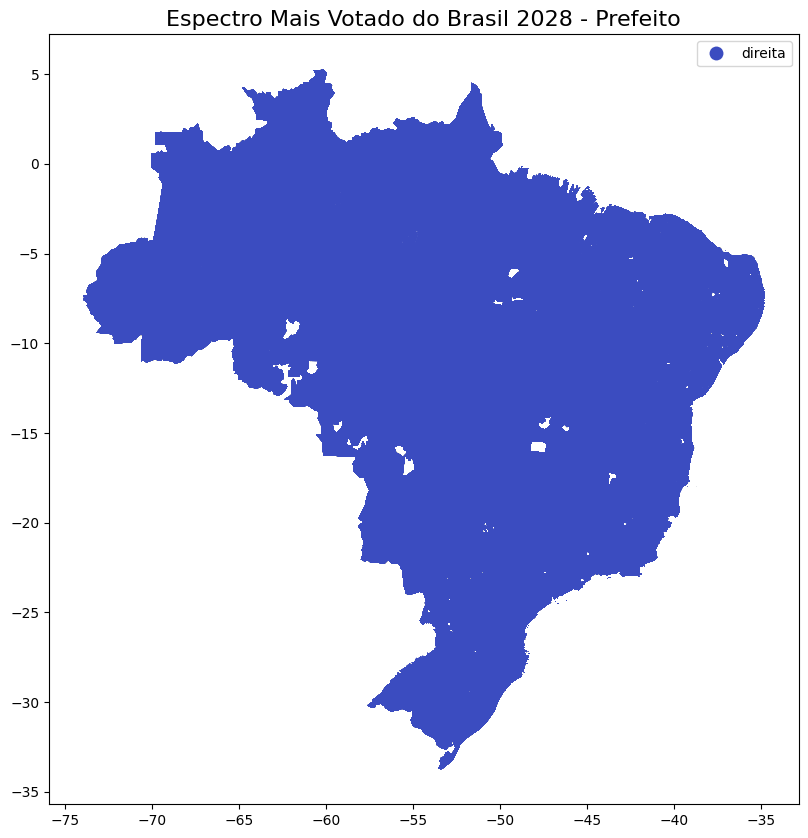

In [78]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Simplificar a geometria para reduzir o uso de memória
geo_df['geometry'] = geo_df['geometry'].simplify(tolerance=0.05, preserve_topology=True)

# Ajustando para garantir que as colunas de junção estejam com os mesmos valores e sem valores faltantes
geo_df['NM_MUN'] = geo_df['NM_MUN'].str.upper()  # Certificar que os nomes dos municípios estão em caixa alta
dados_2028['NM_MUNICIPIO'] = dados_2028['NM_MUNICIPIO'].str.upper()

# Realizando o merge com os dados simplificados
try:
    espectro_mais_votado_2028_geo_df = geo_df.merge(
        dados_2028[['NM_MUNICIPIO', 'Espectro_Previsto']],
        left_on='NM_MUN',
        right_on='NM_MUNICIPIO',
        how='inner'  # Utilizando 'inner' para evitar problemas de memória ao lidar com dados ausentes
    )
except MemoryError:
    print("Erro de memória durante o merge. Tente simplificar mais a geometria ou reduzir o tamanho do dataset.")
    espectro_mais_votado_2028_geo_df = geo_df.head(100).merge(
        dados_2028[['NM_MUNICIPIO', 'Espectro_Previsto']],
        left_on='NM_MUN',
        right_on='NM_MUNICIPIO',
        how='inner'
    )

# Garantindo que existam geometrias válidas para o plot
espectro_mais_votado_2028_geo_df = espectro_mais_votado_2028_geo_df[espectro_mais_votado_2028_geo_df.is_valid]

# Plotando com a geometria simplificada
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
espectro_mais_votado_2028_geo_df.plot(column='Espectro_Previsto', legend=True, cmap='coolwarm', ax=ax)
ax.set_title('Espectro Mais Votado do Brasil 2028 - Prefeito', color='black', size=16)
plt.show()


In [ ]:
# geo_df['geometry'] = geo_df['geometry'].simplify(tolerance=0.01, preserve_topology=True)

# espectro_mais_votado_2028_geo_df = geo_df.merge(dados_2028[['NM_MUNICIPIO', 'Espectro_Previsto']], left_on='NM_MUN', right_on='NM_MUNICIPIO')

# fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# espectro_mais_votado_2028_geo_df.plot(column='Espectro_Previsto', legend=True, cmap='coolwarm', ax=ax)
# ax.set_title('Espectro Mais Votado do Brasil 2028 - Prefeito', color='black', size=16)
# plt.show()


In [ ]:
# import folium
# from folium import Choropleth

# # Criação de um GeoDataFrame simplificado com apenas as colunas necessárias
# espectro_mais_votado_2028_geo_df = geo_df.merge(dados_2028[['NM_MUNICIPIO', 'Espectro_Previsto']], left_on='NM_MUN', right_on='NM_MUNICIPIO')

# # Convertendo para GeoJSON
# espectro_geojson = espectro_mais_votado_2028_geo_df[['geometry', 'Espectro_Previsto']].to_json()

# # Inicializando o mapa com Folium
# m = folium.Map(location=[-15.77972, -47.92972], zoom_start=4)  # Centro aproximado do Brasil

# # Adicionando os polígonos com coloração baseada no espectro previsto
# Choropleth(
#     geo_data=espectro_geojson,
#     name="choropleth",
#     data=espectro_mais_votado_2028_geo_df,
#     columns=['NM_MUNICIPIO', 'Espectro_Previsto'],
#     key_on="feature.properties.Espectro_Previsto",
#     fill_color="RdYlBu",
#     fill_opacity=0.7,
#     line_opacity=0.2,
#     legend_name="Espectro Mais Votado - 2028"
# ).add_to(m)

# # Mostrando o mapa
# folium.LayerControl().add_to(m)
# m.save('espectro_mais_votado_2028.html')
